In [1]:
!pip install tensorflow==2.19.0

In [2]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np

In [3]:
image_dir = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images/images"
label_file = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/annotations/annotations/list.txt"
num_samples = 10
img_size = (224, 224)

In [23]:
with open(label_file, "r") as f:
    lines = f.readlines()[6:]  

all_data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 2:
        filename = parts[0] + ".jpg"
        full_path = os.path.join(image_dir, filename)
        if os.path.exists(full_path):
            all_data.append(full_path)

sample_paths = random.sample(all_data, min(num_samples, len(all_data)))

In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
])


In [25]:
def load_and_augment(image_path):
    img = keras_image.load_img(image_path, target_size=img_size)
    img_array = keras_image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  
    augmented = data_augmentation(img_array)
    return img_array[0].numpy().astype("uint8"), (augmented[0].numpy() * 255).astype("uint8")

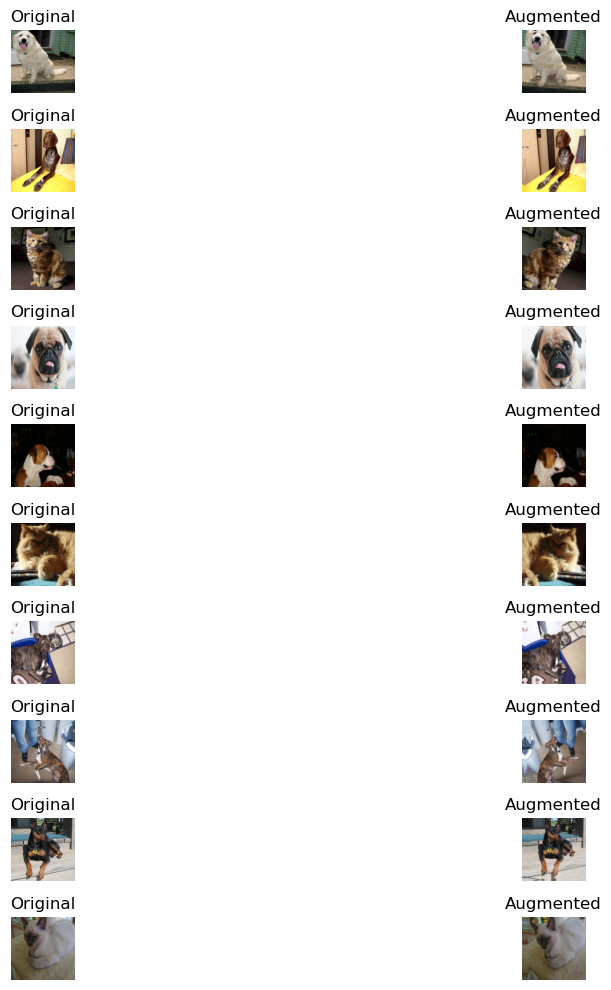

In [27]:
from PIL import Image

plt.figure(figsize=(15, 10))
for i, fname in enumerate(sample_paths):
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path).resize((224, 224))
    img = tf.convert_to_tensor(np.array(img), dtype=tf.uint8)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Ensure in [0, 1]

    augmented_img = data_augmentation(img)

    plt.subplot(10, 2, 2*i+1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(10, 2, 2*i+2)
    plt.imshow(augmented_img)
    plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.show()